<a href="https://colab.research.google.com/github/ZerXXX0/Cloud-classification-with-maxvit/blob/main/YOLO_GCD_CCSN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

inaiwt_gcd_dataset_path = kagglehub.dataset_download('inaiwt/gcd-dataset')
inaiwt_gcd_ccsn_val_reduced_path = kagglehub.dataset_download('inaiwt/gcd-ccsn-val-reduced')

print('Data source import complete.')


In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 18.6 MB/s eta 0:00:00a 0:00:01


In [ ]:
import ultralytics
import os
print(os.listdir("/kaggle/input/gcd-ccsn-val-reduced/"))
print(os.listdir("/kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20)"))
print(dir(ultralytics))

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
['GCD val from Train', 'CCSN Val from Train(80_20)']
['val', 'test', 'train']
['ASSETS', 'FastSAM', 'NAS', 'RTDETR', 'SAM', 'SETTINGS', 'YOLO', 'YOLOWorld', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'cfg', 'checks', 'data', 'download', 'engine', 'hub', 'models', 'nn', 'os', 'settings', 'utils']


In [ ]:
from ultralytics import YOLO

In [ ]:
from ultralytics import YOLO

# Load YOLOv12 classification model (pretrained or custom)
model = YOLO('yolo11l-cls.pt')  # Load pretrained model (change if using a custom model)

# Train the model
model.train(data='/kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20)',
            epochs=100, imgsz=224, batch=32, device="0,1")

100%|██████████| 27.2M/27.2M [00:00<00:00, 178MB/s]


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11l-cls.pt, data=/kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20), epochs=100, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=0,1, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

In [ ]:
# Load YOLOv12 classification model (pretrained or custom)
model = YOLO('/kaggle/working/runs/classify/train19/weights/best.pt')  # Load pretrained model (change if using a custom model)

# Train the model
model.train(data='/kaggle/input/gcd-ccsn-val-reduced/GCD val from Train',
            epochs=100, imgsz=224, batch=236, device="0,1")

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=/kaggle/working/runs/classify/train19/weights/best.pt, data=/kaggle/input/gcd-ccsn-val-reduced/GCD val from Train, epochs=100, time=None, patience=100, batch=236, imgsz=224, save=True, save_period=-1, cache=False, device=0,1, workers=8, project=None, name=train20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

In [ ]:
# Validate the model
metrics = model.val(data='/kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20)', split="test")
print("Validation Accuracy:", metrics)

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
YOLO11l-cls summary (fused): 94 layers, 12,824,837 parameters, 0 gradients, 49.3 GFLOPs
train: /kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20)/train... found 717 images in 5 classes ✅ 
val: /kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20)/val... found 183 images in 5 classes ✅ 
test: /kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20)/test... found 224 images in 5 classes ✅ 


test: Scanning /kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20)/test... 224 images, 0 corrupt: 100%|██████████| 224/224 [00:00<00:00, 1256.40it/s]

test: WARNING ⚠️ Cache directory /kaggle/input/gcd-ccsn-val-reduced/CCSN Val from Train(80_20) is not writeable, cache not saved.



               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.339          1
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train202
Validation Accuracy: ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7848e127c790>
curves: []
curves_results: []
fitness: 0.6696428507566452
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.3392857015132904, 'metrics/accuracy_top5': 1.0, 'fitness': 0.6696428507566452}
save_dir: PosixPath('runs/classify/train202')
speed: {'preprocess': 0.05391049999811263, 'inference': 2.3363226607143264, 'loss': 6.072767990060259e-05, 'postprocess': 0.00022900000219903762}
task: 'classify'
top1: 0.3392857015132904
top5: 1.0


In [ ]:
# Validate the model
metrics = model.val(data='/kaggle/input/gcd-ccsn-val-reduced/GCD val from Train', split="test")
print("Validation Accuracy:", metrics)

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
train: /kaggle/input/gcd-ccsn-val-reduced/GCD val from Train/train... found 717 images in 5 classes ✅ 
val: /kaggle/input/gcd-ccsn-val-reduced/GCD val from Train/val... found 1466 images in 5 classes ✅ 
test: /kaggle/input/gcd-ccsn-val-reduced/GCD val from Train/test... found 830 images in 5 classes ✅ 


test: Scanning /kaggle/input/gcd-ccsn-val-reduced/GCD val from Train/test... 830 images, 0 corrupt: 100%|██████████| 830/830 [00:00<00:00, 1658.45it/s]


test: WARNING ⚠️ Cache directory /kaggle/input/gcd-ccsn-val-reduced/GCD val from Train is not writeable, cache not saved.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.373          1
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train203
Validation Accuracy: ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7849a54a4100>
curves: []
curves_results: []
fitness: 0.6867469847202301
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.3734939694404602, 'metrics/accuracy_top5': 1.0, 'fitness': 0.6867469847202301}
save_dir: PosixPath('runs/classify/train203')
speed: {'preprocess': 0.05655388674630919, 'inference': 2.3163486554215313, 'loss': 7.052409624104411e-05, 'postprocess': 0.0001616421681078409}
task: 'classify'
top1: 0.3734939694404602
top5: 1.0


In [ ]:
import pandas as pd

# Load training logs
df = pd.read_csv("/kaggle/working/runs/classify/train20/results.csv")

# Show available columns
print(df.columns)

# Print last epoch results
print(df)

Index(['epoch', 'time', 'train/loss', 'metrics/accuracy_top1',
       'metrics/accuracy_top5', 'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
    epoch      time  train/loss  metrics/accuracy_top1  metrics/accuracy_top5  \
0       1   11.1571     1.91809                0.44134                      1   
1       2   18.2766     2.28104                0.47476                      1   
2       3   25.2689     1.79595                0.53342                      1   
3       4   32.4326     0.78042                0.58322                      1   
4       5   39.8757     0.65328                0.45225                      1   
..    ...       ...         ...                    ...                    ...   
95     96  701.3110     0.17200                0.55798                      1   
96     97  708.3330     0.24862                0.51910                      1   
97     98  715.4400     0.28927                0.51637                      1   
98     99  722.7920     0.1519

Train in GCD & CCSN


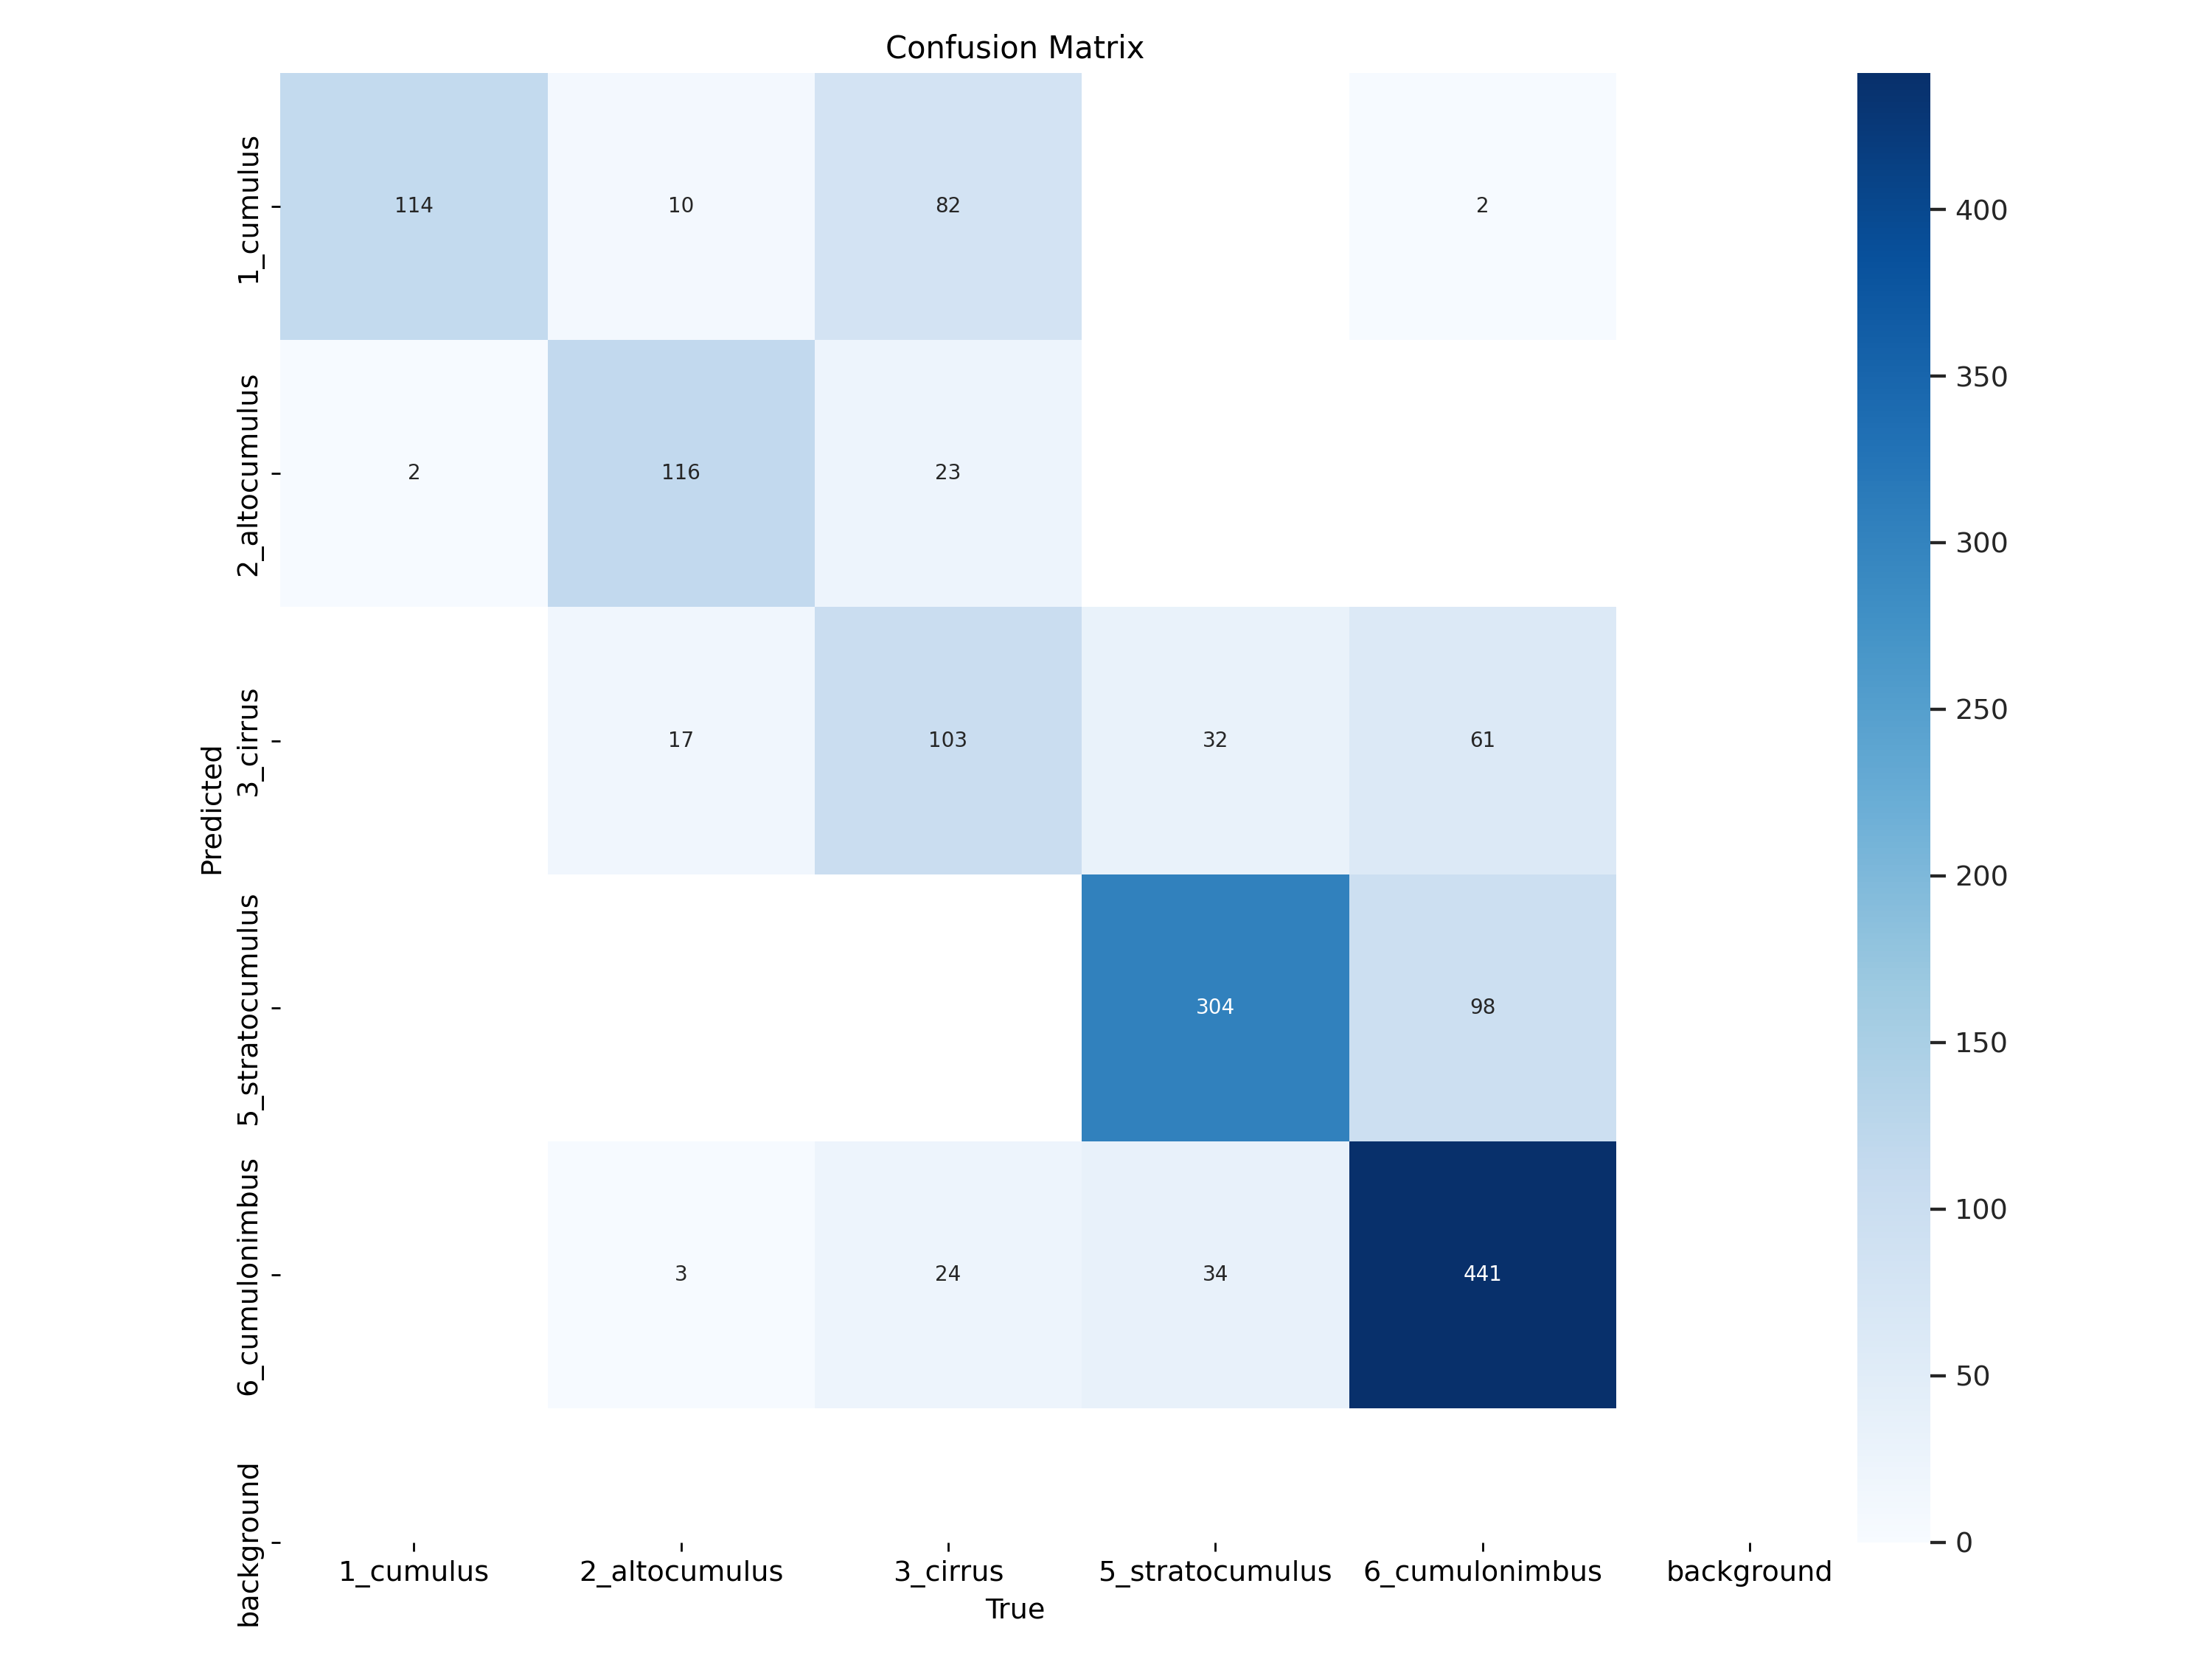

Train in GCD & CCSN


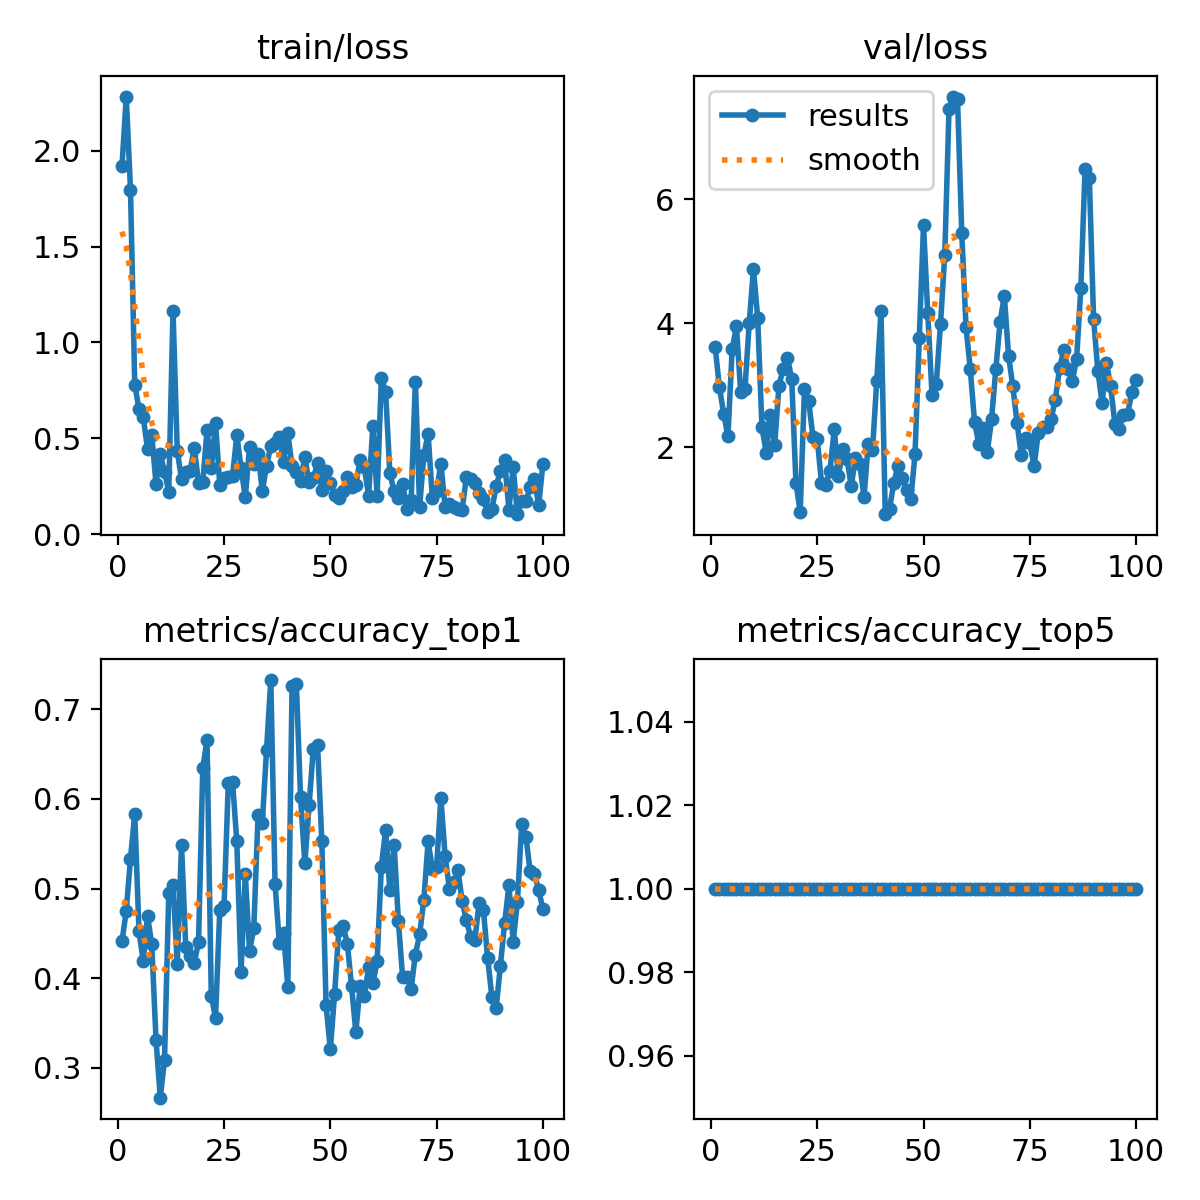

Train in GCD & CCSN


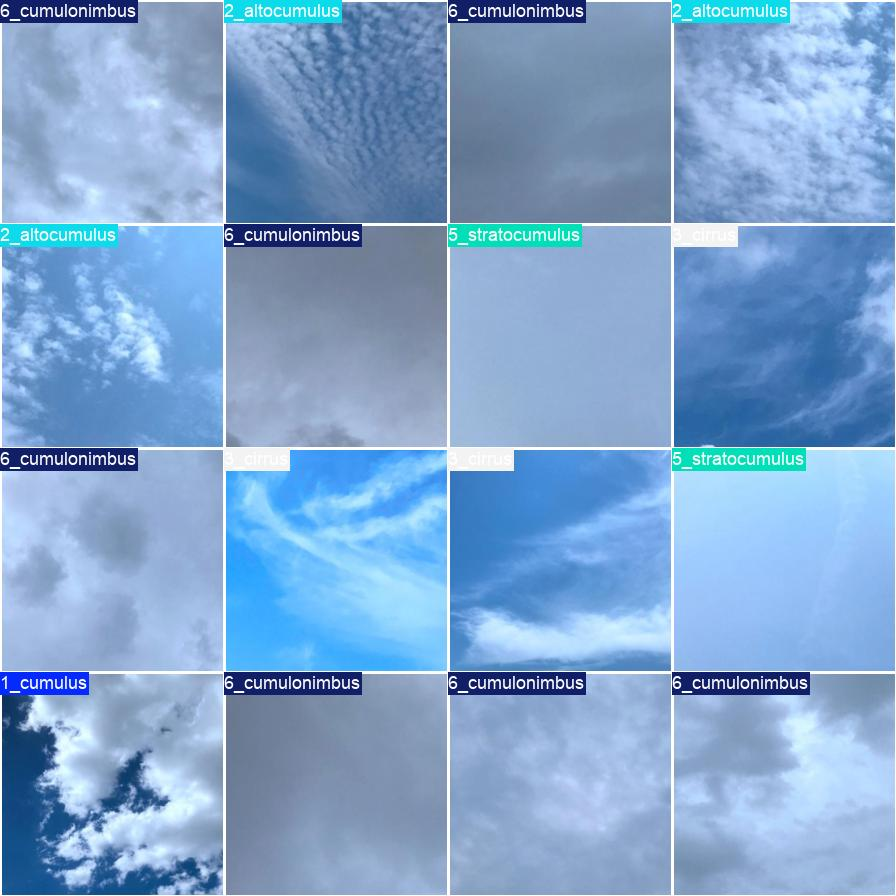

Val in CCSN


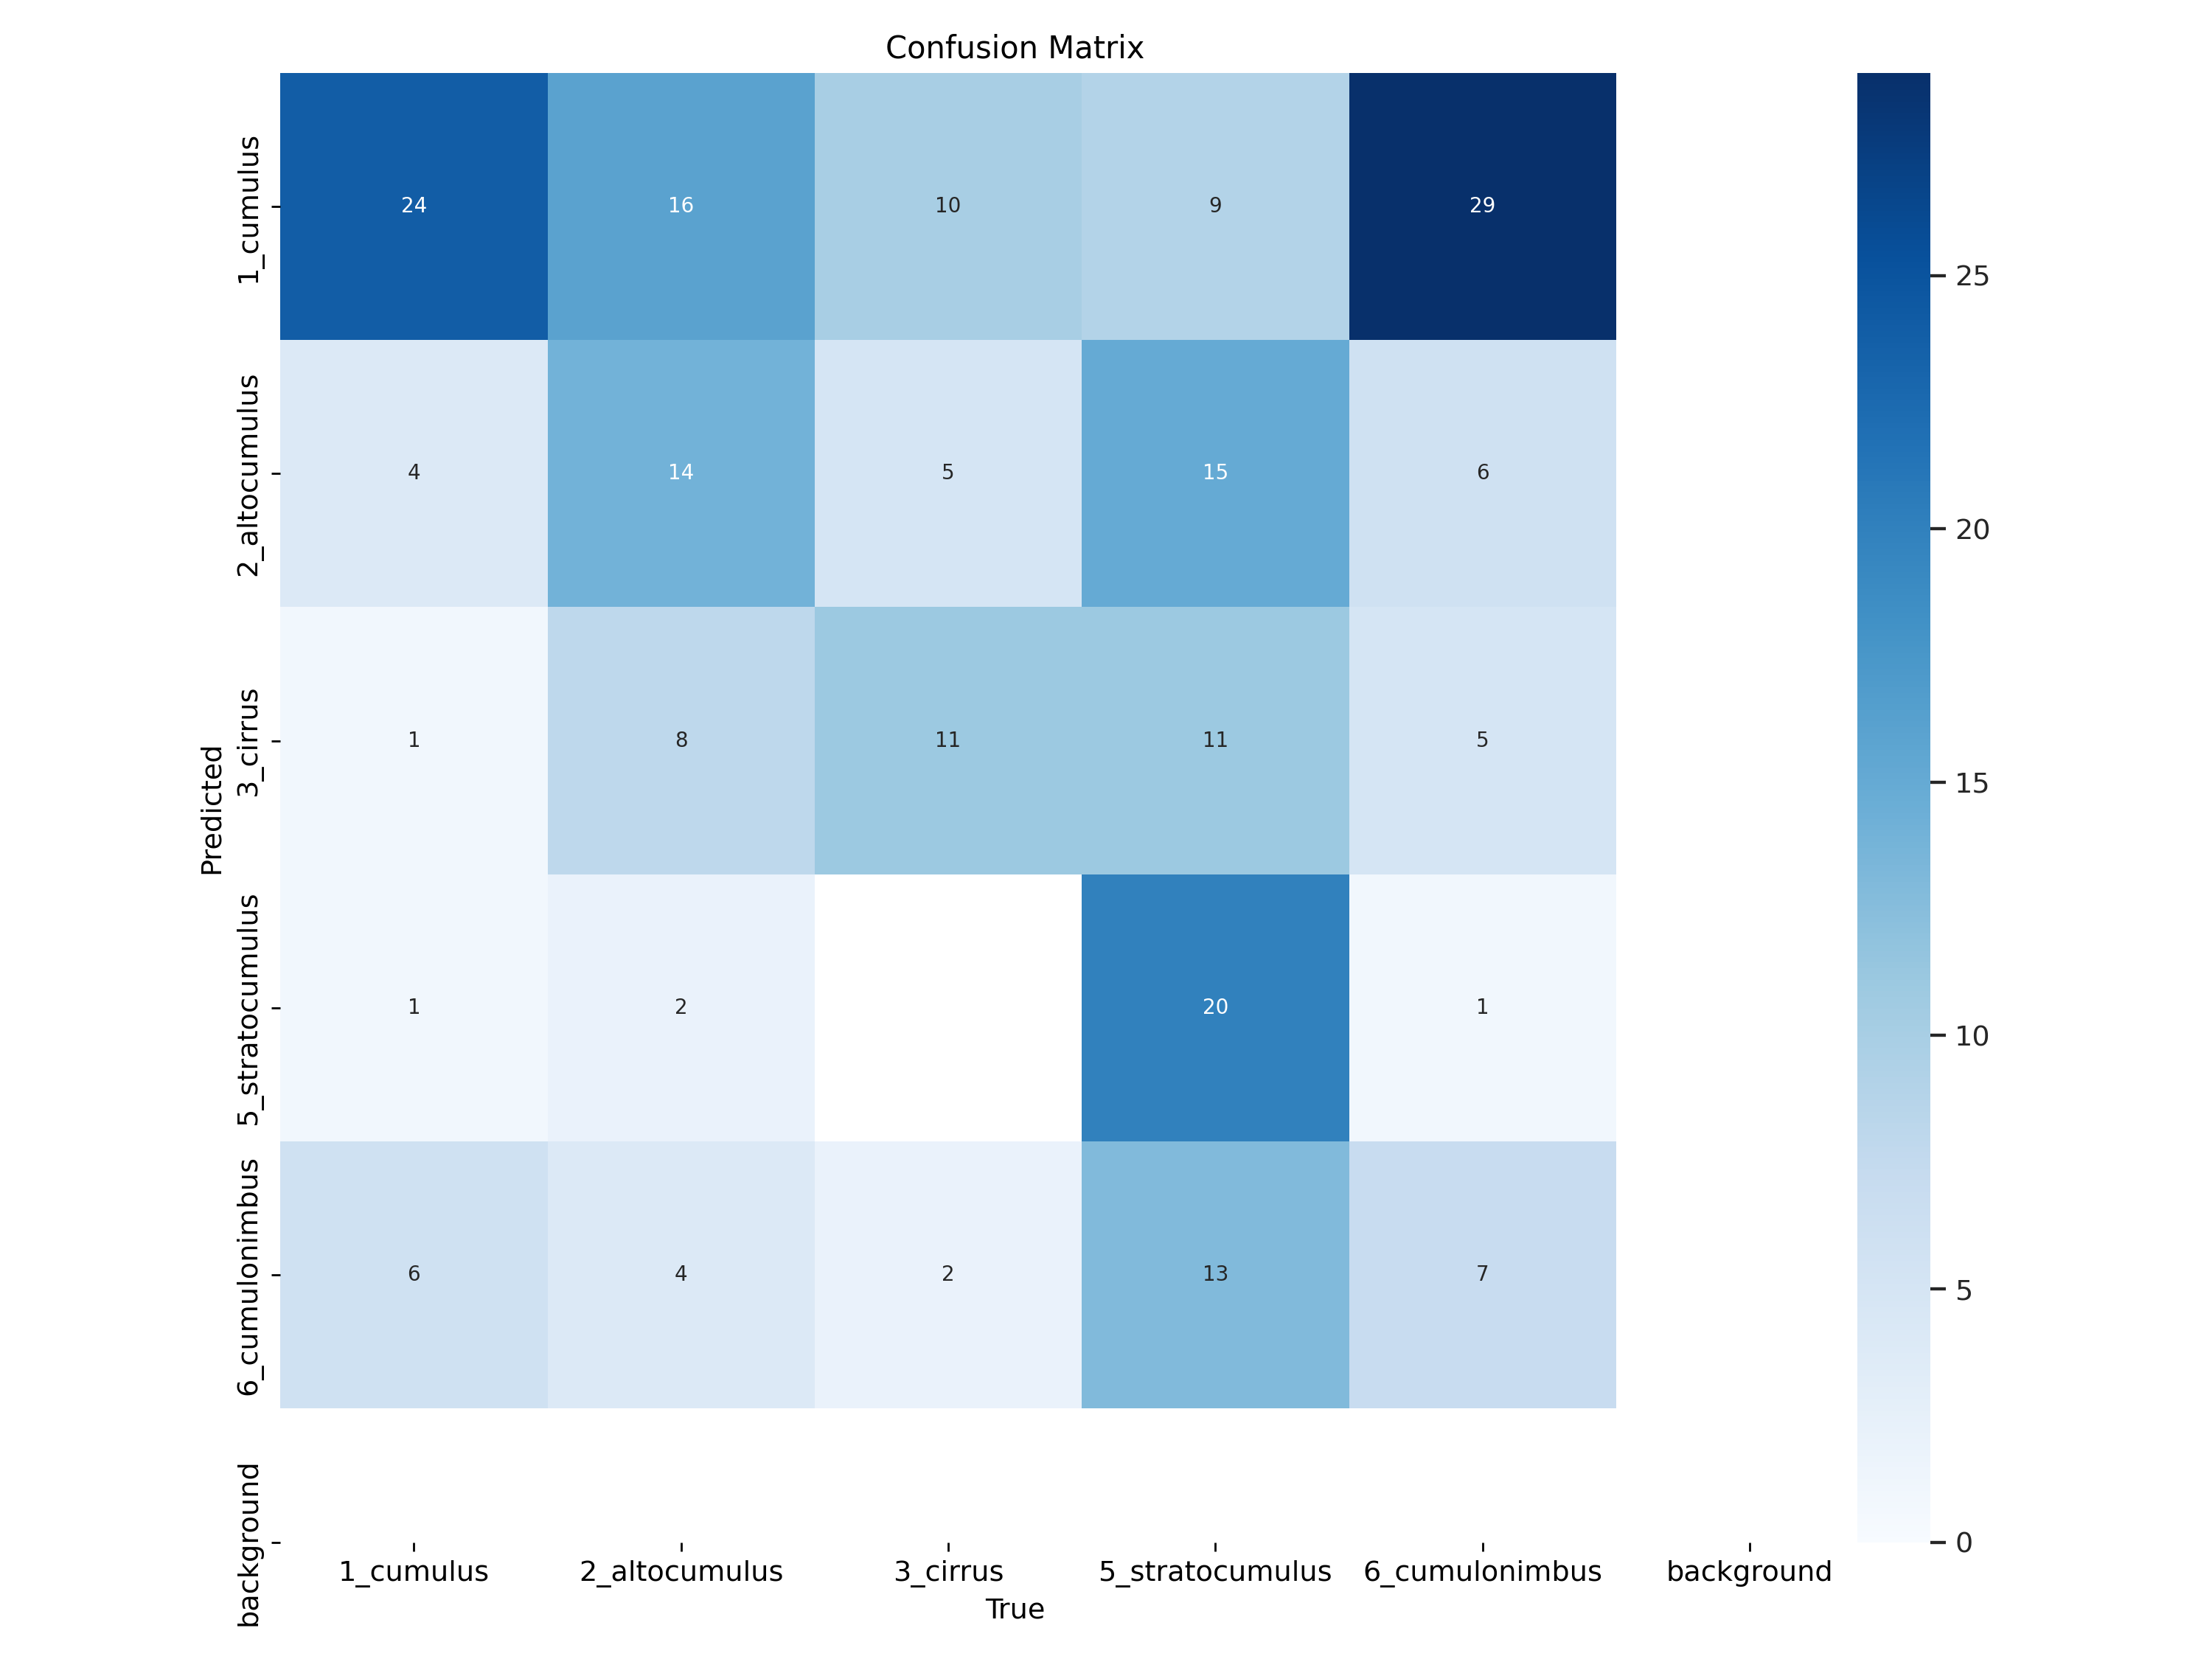

Val in GCD


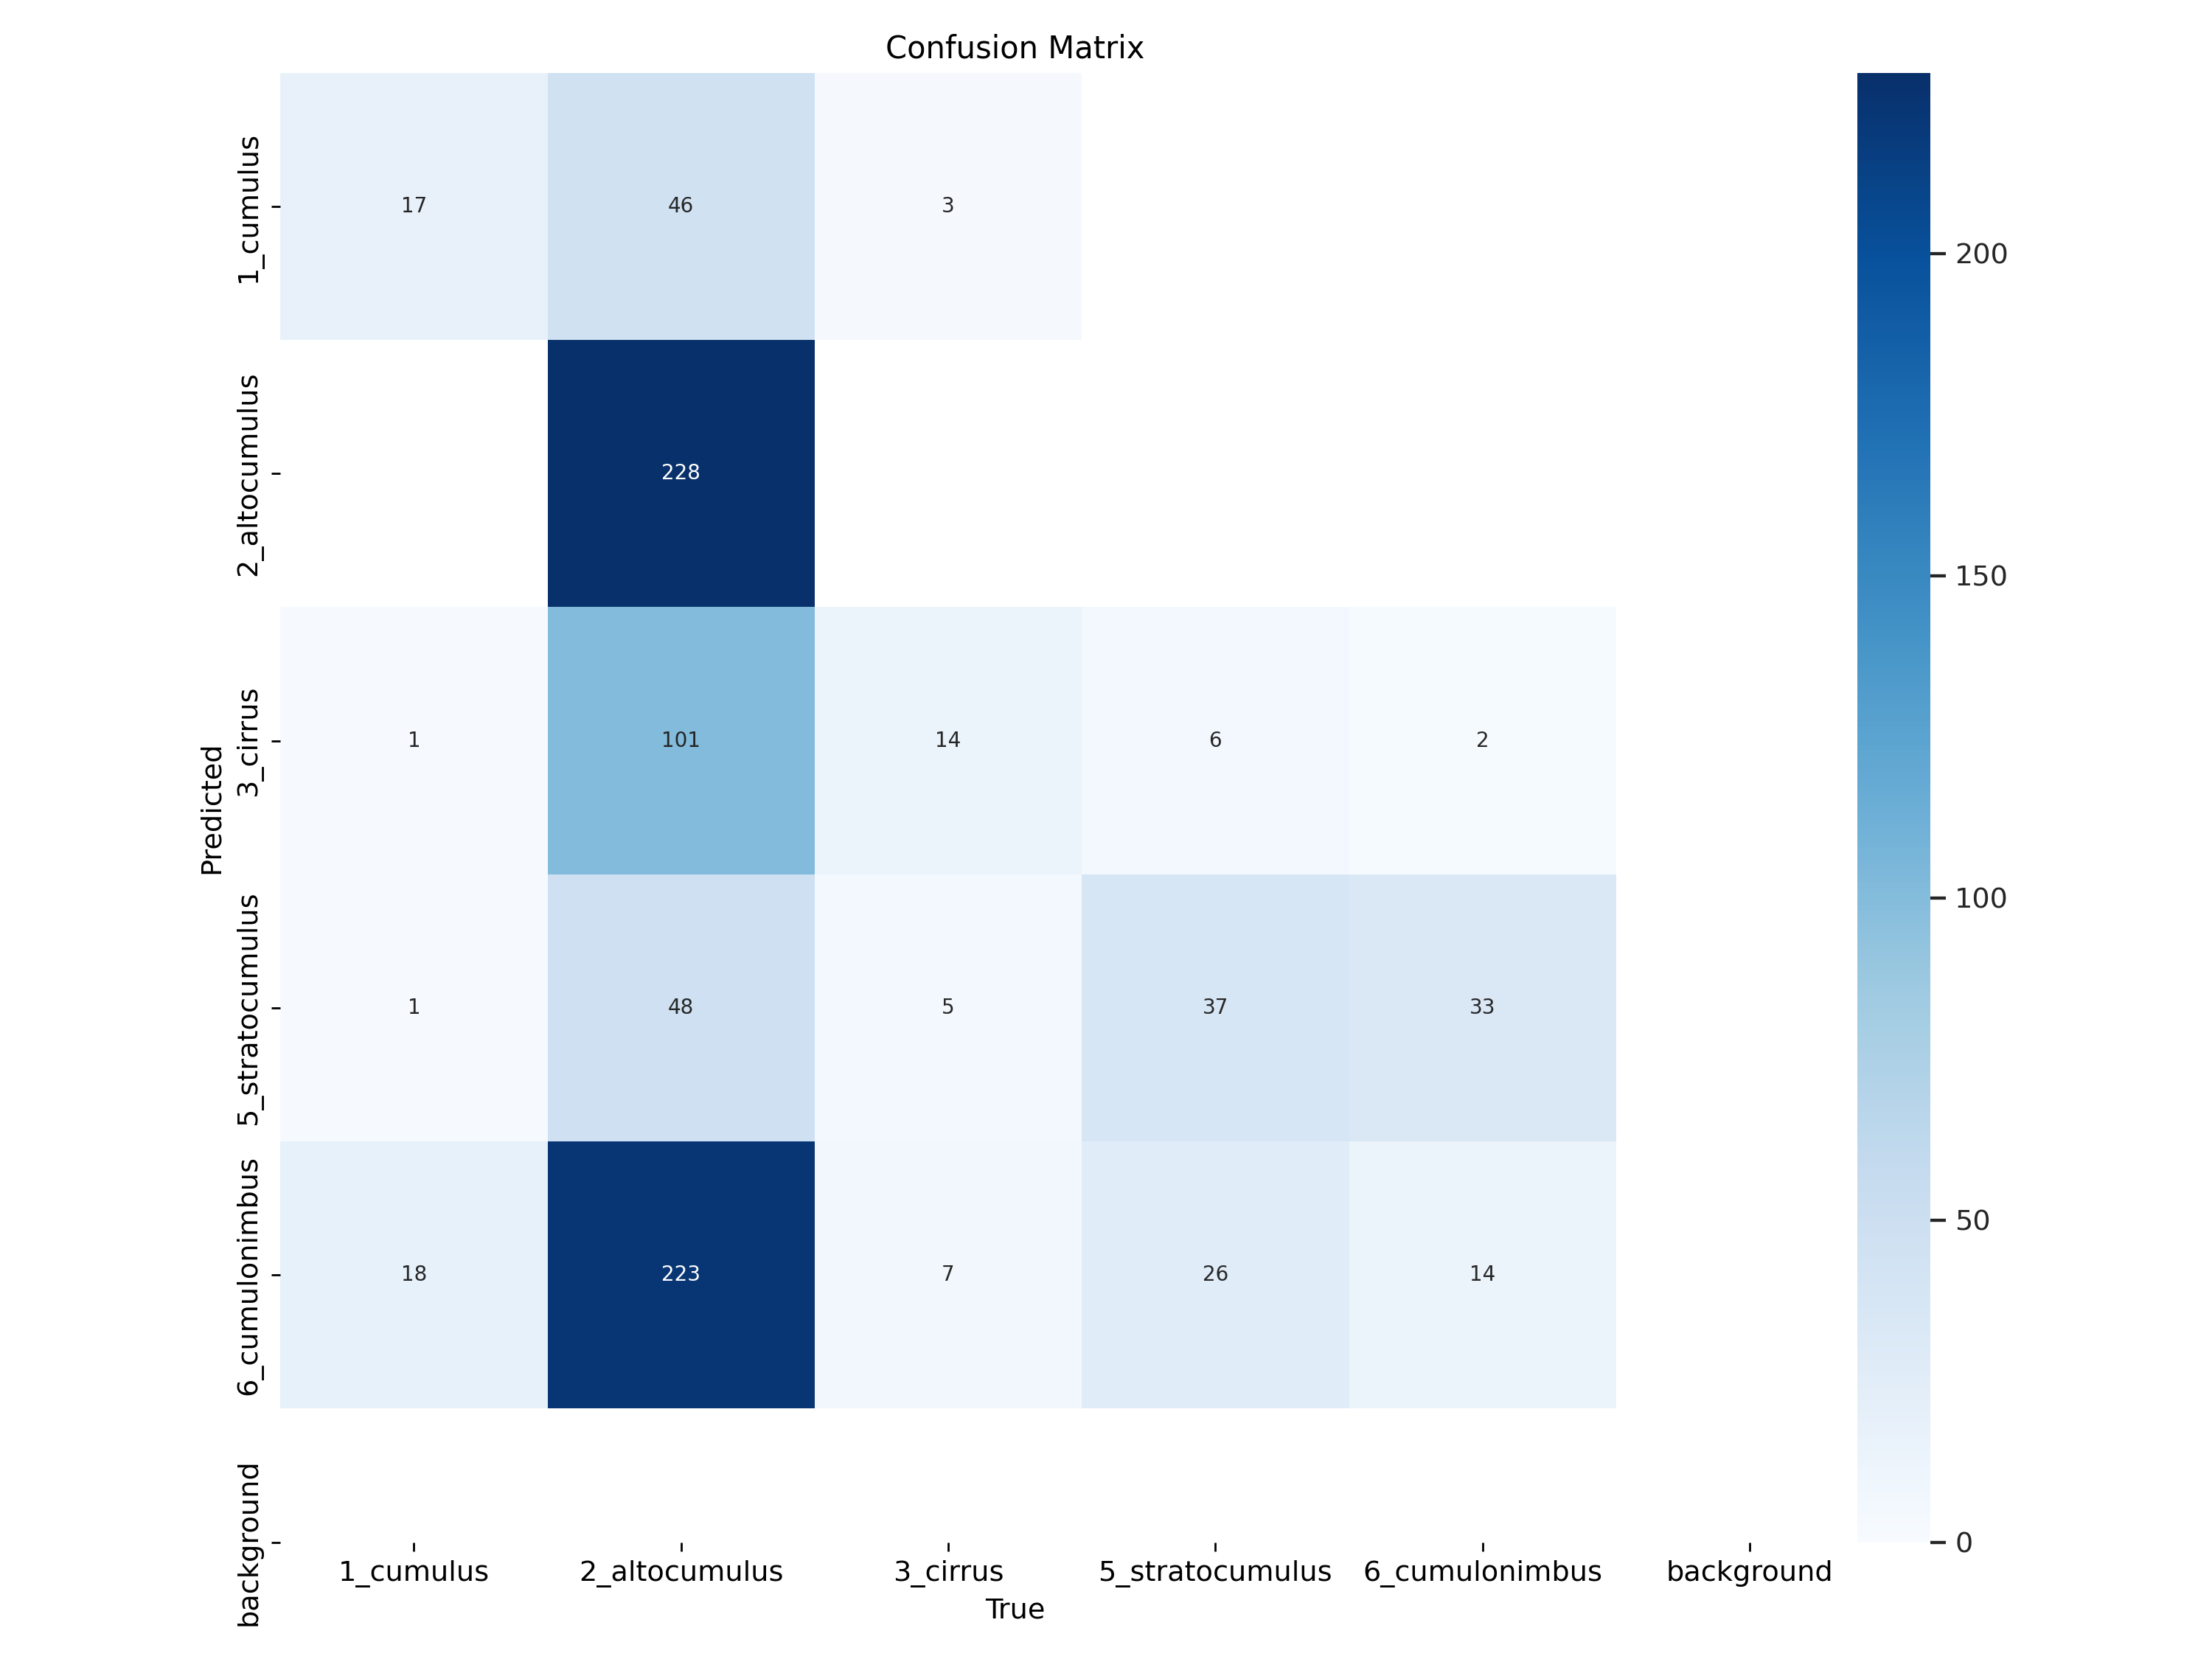

In [ ]:
from PIL import Image
from IPython.display import display

print("Train in GCD & CCSN")
img = Image.open("/kaggle/working/runs/classify/train20/confusion_matrix.png")
display(img)

print("Train in GCD & CCSN")
img = Image.open("/kaggle/working/runs/classify/train20/results.png")
display(img)

print("Train in GCD & CCSN")
img = Image.open("/kaggle/working/runs/classify/train20/val_batch0_labels.jpg")
display(img)

print("Val in CCSN")
img = Image.open("/kaggle/working/runs/classify/train202/confusion_matrix.png")
display(img)

print("Val in GCD")
img = Image.open("/kaggle/working/runs/classify/train203/confusion_matrix.png")
display(img)